In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree, set_link_color_palette
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Dane_projekt.csv')

In [3]:
df['region'].unique()

array(['Africa', 'South Asia', 'East and Southeast Asia', 'Middle East',
       'Australia and Oceania', 'Central Asia',
       'Central America and the Caribbean', 'South America', 'Europe',
       'North America'], dtype=object)

In [4]:
df_regions = df[df['region'].isin(['Europe','Central America and the Caribbean','South America','Africa'])]

In [5]:
df_regions

,Country,Total fertility rate,region,Median age,Life expectancy at birth,Income Gini index,Wealth Gini Index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing
0,Niger,6.73,Africa,14.8,60.48,37.3,0.682,24.0,17.2,16.751,0.646,21.458482,22.383247,29.118
1,Angola,5.76,Africa,15.9,62.51,51.3,0.731,24.7,21.4,67.460,0.901,22.436538,24.376501,28.870
2,DR Congo,5.56,Africa,16.7,62.23,42.1,0.755,24.2,19.0,46.235,0.948,21.443568,22.708692,29.928
3,Mali,5.45,Africa,16.0,62.81,36.1,0.707,25.8,18.8,44.677,0.876,22.999918,23.182216,28.936
4,Benin,5.39,Africa,17.0,62.60,37.8,0.707,23.8,18.7,48.972,0.785,22.666707,24.579594,29.149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Greece,1.40,Europe,45.3,81.71,33.1,0.654,32.9,30.1,80.038,0.175,27.656249,26.915742,31.535
141,Bosnia and Herzegovina,1.37,Europe,43.3,78.22,33.0,0.642,29.5,26.8,49.425,0.416,26.530714,25.340139,29.080
142,Mauritius,1.35,Africa,36.3,75.13,36.8,0.662,29.8,25.4,40.775,0.641,24.670173,26.066932,28.760
143,Spain,1.29,Europe,43.9,82.78,34.3,0.694,35.6,33.6,81.056,0.438,27.162678,24.929999,32.130


In [6]:
df_regions.shape

(99, 14)

In [7]:
df_gdp = pd.read_excel('gdpcapita.xlsx')

In [8]:
df_gdp

,Country,gdp_capita
0,Albania,6492.87
1,Austria,53637.71
2,Belarus,7302.26
3,Belgium,51247.02
4,Bosnia and Herzegovina,7143.31
...,...,...
104,Togo,973.21
105,Tunisia,3807.14
106,Uganda,883.89
107,Zambia,1137.34


In [9]:
df_gdp.dtypes

Country        object
gdp_capita    float64
dtype: object

In [10]:
df_regions=pd.merge(df_regions, df_gdp, on=['Country'], how="inner")

In [11]:
df_regions.shape

(96, 15)

In [12]:
df_regions

,Country,Total fertility rate,region,Median age,Life expectancy at birth,Income Gini index,Wealth Gini Index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,gdp_capita
0,Niger,6.73,Africa,14.8,60.48,37.3,0.682,24.0,17.2,16.751,0.646,21.458482,22.383247,29.118,590.63
1,Angola,5.76,Africa,15.9,62.51,51.3,0.731,24.7,21.4,67.460,0.901,22.436538,24.376501,28.870,1953.53
2,DR Congo,5.56,Africa,16.7,62.23,42.1,0.755,24.2,19.0,46.235,0.948,21.443568,22.708692,29.928,577.21
3,Mali,5.45,Africa,16.0,62.81,36.1,0.707,25.8,18.8,44.677,0.876,22.999918,23.182216,28.936,873.79
4,Benin,5.39,Africa,17.0,62.60,37.8,0.707,23.8,18.7,48.972,0.785,22.666707,24.579594,29.149,1319.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Greece,1.40,Europe,45.3,81.71,33.1,0.654,32.9,30.1,80.038,0.175,27.656249,26.915742,31.535,20192.60
92,Bosnia and Herzegovina,1.37,Europe,43.3,78.22,33.0,0.642,29.5,26.8,49.425,0.416,26.530714,25.340139,29.080,7143.31
93,Mauritius,1.35,Africa,36.3,75.13,36.8,0.662,29.8,25.4,40.775,0.641,24.670173,26.066932,28.760,9106.24
94,Spain,1.29,Europe,43.9,82.78,34.3,0.694,35.6,33.6,81.056,0.438,27.162678,24.929999,32.130,30103.51


Stracilismy 3 kraje, bo na poczatku bylo 99

In [13]:
df_regions = df_regions.set_index('Country')

In [14]:
df_regions.head(5)

,Total fertility rate,region,Median age,Life expectancy at birth,Income Gini index,Wealth Gini Index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,gdp_capita
Country,,,,,,,,,,,,,,
Niger,6.73,Africa,14.8,60.48,37.3,0.682,24.0,17.2,16.751,0.646,21.458482,22.383247,29.118,590.63
Angola,5.76,Africa,15.9,62.51,51.3,0.731,24.7,21.4,67.460,0.901,22.436538,24.376501,28.870,1953.53
DR Congo,5.56,Africa,16.7,62.23,42.1,0.755,24.2,19.0,46.235,0.948,21.443568,22.708692,29.928,577.21
Mali,5.45,Africa,16.0,62.81,36.1,0.707,25.8,18.8,44.677,0.876,22.999918,23.182216,28.936,873.79
Benin,5.39,Africa,17.0,62.60,37.8,0.707,23.8,18.7,48.972,0.785,22.666707,24.579594,29.149,1319.16


In [15]:
df_regions = df_regions.loc[:,df_regions.columns.isin(['Total fertility rate','Age at first mariage (men)','Age at first mariage (women)','Mean Age Childbearing','Life expectancy at birth','gdp_capita'])]

In [16]:
df_regions.head(5)

,Total fertility rate,Life expectancy at birth,Age at first mariage (men),Age at first mariage (women),Mean Age Childbearing,gdp_capita
Country,,,,,,
Niger,6.73,60.48,24.0,17.2,29.118,590.63
Angola,5.76,62.51,24.7,21.4,28.870,1953.53
DR Congo,5.56,62.23,24.2,19.0,29.928,577.21
Mali,5.45,62.81,25.8,18.8,28.936,873.79
Benin,5.39,62.60,23.8,18.7,29.149,1319.16


standaryzacja

In [17]:
std_scaler = StandardScaler()
df_regions_std = pd.DataFrame(std_scaler.fit_transform(df_regions),
                               columns=df_regions.columns,
                               index=df_regions.index)

In [18]:
df_regions_std.head(5)

,Total fertility rate,Life expectancy at birth,Age at first mariage (men),Age at first mariage (women),Mean Age Childbearing,gdp_capita
Country,,,,,,
Niger,3.007347,-1.705117,-1.271729,-1.604212,-0.219715,-0.662812
Angola,2.286828,-1.433824,-1.098607,-0.782855,-0.398179,-0.608384
DR Congo,2.138268,-1.471244,-1.222266,-1.252202,0.363172,-0.663348
Mali,2.056559,-1.393731,-0.826557,-1.291314,-0.350684,-0.651504
Benin,2.011991,-1.421796,-1.321193,-1.310870,-0.197406,-0.633718


ta funkcja odpowiada za wykres

In [19]:
def optimal_k_means(data,max_k):
    means =[]
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    plt.plot(means,inertias,'o-')
    plt.xlabel('n_clusters')
    plt.ylabel('Inertia')
    plt.show()

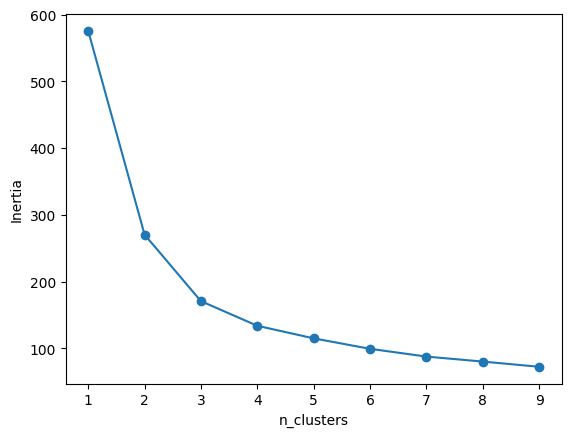

In [20]:
optimal_k_means(df_regions_std,10)

te init=random,random_state=15,n_init=20 wzialem z zajec i ufam ze to moze tak byc

In [21]:
kmeans = KMeans(n_clusters=3,
                init='random',
                random_state=15,
                n_init=20)

In [22]:
results = kmeans.fit(df_regions_std)

In [23]:
kmeans.fit(df_regions_std)

KMeans(init='random', n_clusters=3, n_init=20, random_state=15)

wartość kryterium - suma kwadratów odległości punktów od najbliższych im środków ciężkości
<br /> SSE - sum of squared errors

In [24]:
results.inertia_

170.86061775141474

przynależność obiektów do skupień

In [25]:
results.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 1])

środki ciężkości (dane standaryzowane)

<b>interpretacja</b>: wektory ponizej wyznaczają centra kazdego z czterech klastrow
</br >zgodnie z tym co znalazlem w tym watku https://stackoverflow.com/questions/70555989/how-to-interpret-the-value-of-cluster-centers-in-k-means

In [26]:
results.cluster_centers_

array([[ 1.20583099, -1.06599436, -0.9603997 , -1.0819488 , -0.24301728,
        -0.63205783],
       [-0.76039844,  1.03699114,  1.06047859,  1.11865005,  1.12514723,
         1.09075492],
       [-0.56832189,  0.16043982,  0.026226  ,  0.10083618, -0.79661967,
        -0.35102129]])

środki ciężkości - ramka z opisem

In [27]:
df_regions_center = pd.DataFrame(results.cluster_centers_,
                          columns=df_regions_std.columns)
df_regions_center

,Total fertility rate,Life expectancy at birth,Age at first mariage (men),Age at first mariage (women),Mean Age Childbearing,gdp_capita
0,1.205831,-1.065994,-0.960400,-1.081949,-0.243017,-0.632058
1,-0.760398,1.036991,1.060479,1.118650,1.125147,1.090755
2,-0.568322,0.160440,0.026226,0.100836,-0.796620,-0.351021


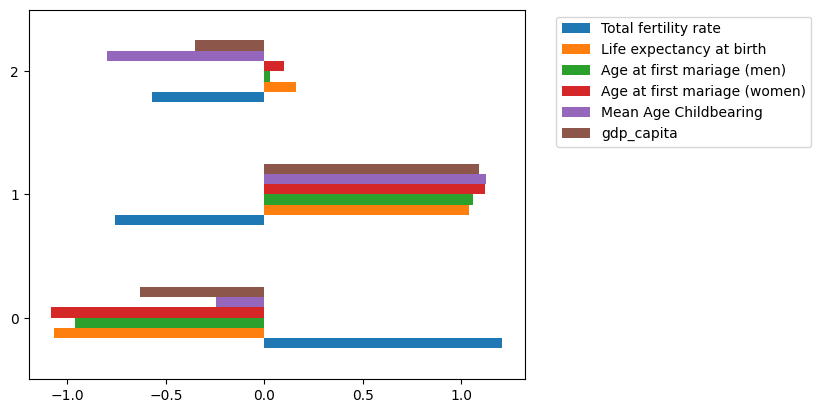

In [28]:
df_regions_center.plot.barh()
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [29]:
df_regions['group'] = results.labels_

In [30]:
df_regions.head(5)

,Total fertility rate,Life expectancy at birth,Age at first mariage (men),Age at first mariage (women),Mean Age Childbearing,gdp_capita,group
Country,,,,,,,
Niger,6.73,60.48,24.0,17.2,29.118,590.63,0
Angola,5.76,62.51,24.7,21.4,28.870,1953.53,0
DR Congo,5.56,62.23,24.2,19.0,29.928,577.21,0
Mali,5.45,62.81,25.8,18.8,28.936,873.79,0
Benin,5.39,62.60,23.8,18.7,29.149,1319.16,0


In [31]:
df_regions['group'].unique()

array([0, 2, 1])

środki ciężkości skupień - dane pierwotne

In [32]:
df_regions.groupby('group').mean(numeric_only=True)

,Total fertility rate,Life expectancy at birth,Age at first mariage (men),Age at first mariage (women),Mean Age Childbearing,gdp_capita
group,,,,,,
0,4.304706,65.262353,25.258824,19.870588,29.085618,1360.730294
1,1.657667,80.998333,33.430000,31.123333,30.986867,44500.539000
2,1.916250,74.439375,29.248125,25.918750,28.316312,8397.979375


wizualizacja - środki ciężkości (dane pierwotne)

ten wykres nie ma sensu bo skala jest zbyt nieproporcjonalna, poprzedni wykres na danych zestandaryzowanych ma za to sens

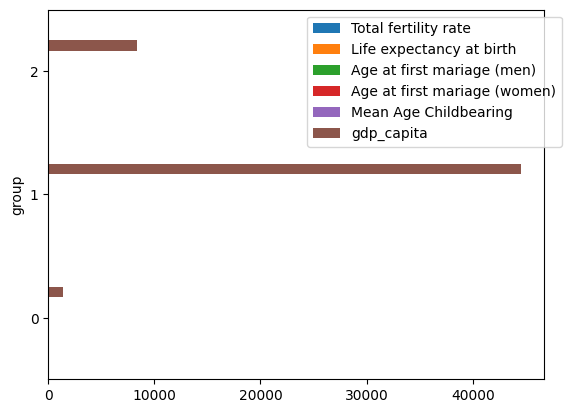

In [33]:
df_regions.groupby('group').mean(numeric_only=True).plot.barh()
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [34]:
n_clusters = 3

In [35]:
for i in range(n_clusters):
    print(f'''W skupieniu {i} są następujące obiekty:\
    {df_regions[df_regions['group'] == i].index.values}''')

W skupieniu 0 są następujące obiekty:    ['Niger' 'Angola' 'DR Congo' 'Mali' 'Benin' 'Chad' 'Uganda' 'Burundi'
 'Guinea' 'Mozambique' 'Liberia' 'Nigeria' 'Sudan' 'Cameroon' 'Zambia'
 'Tanzania' 'Congo' 'Togo' 'Senegal' 'Burkina Faso'
 'Central African Republic' 'Ethiopia' 'Zimbabwe' 'Sierra Leone' 'Gambia'
 'Ghana' 'Madagascar' 'Mauritania' 'Malawi' 'Gabon' 'Rwanda' 'Kenya'
 'Lesotho' 'Comoros']
W skupieniu 1 są następujące obiekty:    ['Algeria' 'France' 'Tunisia' 'Iceland' 'Ireland' 'Norway' 'Netherlands'
 'Denmark' 'Belgium' 'Chile' 'Finland' 'Sweden' 'Luxembourg'
 'United Kingdom' 'Estonia' 'Lithuania' 'Slovenia' 'Switzerland' 'Germany'
 'Latvia' 'Austria' 'Malta' 'Czech Republic' 'Hungary' 'Cyprus' 'Croatia'
 'Portugal' 'Greece' 'Spain' 'Italy']
W skupieniu 2 są następujące obiekty:    ['Namibia' 'Egypt' 'Haiti' 'Panama' 'Botswana' 'Morocco' 'Bolivia' 'Peru'
 'Argentina' 'South Africa' 'Djibouti' 'Guyana' 'El Salvador' 'Ecuador'
 'Colombia' 'Paraguay' 'Costa Rica' 'Seychelles' 'Ni

ocena dopasowania

In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
import numpy as np

Obydwa wskazniki dzialaja tak, ze im wieksze wartosci, tym lepiej

In [37]:
print(f'silhouette_score: {np.round(silhouette_score(df_regions_std, kmeans.fit(df_regions_std).labels_),2)}')
print(f'calinski_harabasz_score: {np.round(calinski_harabasz_score(df_regions_std, kmeans.fit(df_regions_std).labels_),2)}')

silhouette_score: 0.41
calinski_harabasz_score: 110.26


#### Ilustracja skupień w przestrzeni składowych

In [38]:
pca = PCA(n_components=2)
results_pca = pca.fit_transform(df_regions_std)

Widac, ze 2 elementy wyjasniaja ponad 80% wariancji

In [39]:
pca.explained_variance_ratio_

array([0.70989137, 0.15307756])

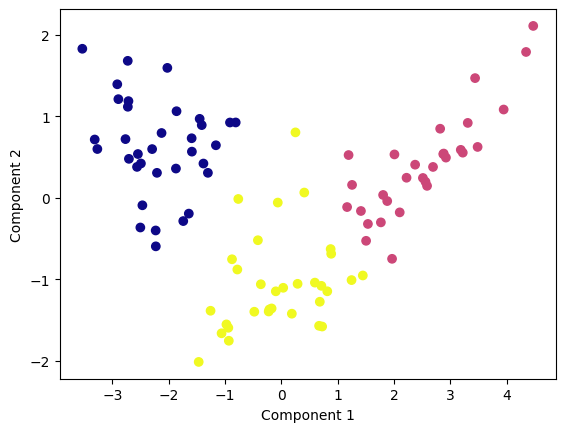

In [40]:
plt.scatter(results_pca[:,0], results_pca[:,1],
           c = kmeans.fit(df_regions_std).labels_, # kolor reprezentuje przynależność do skupienia
           cmap='plasma')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

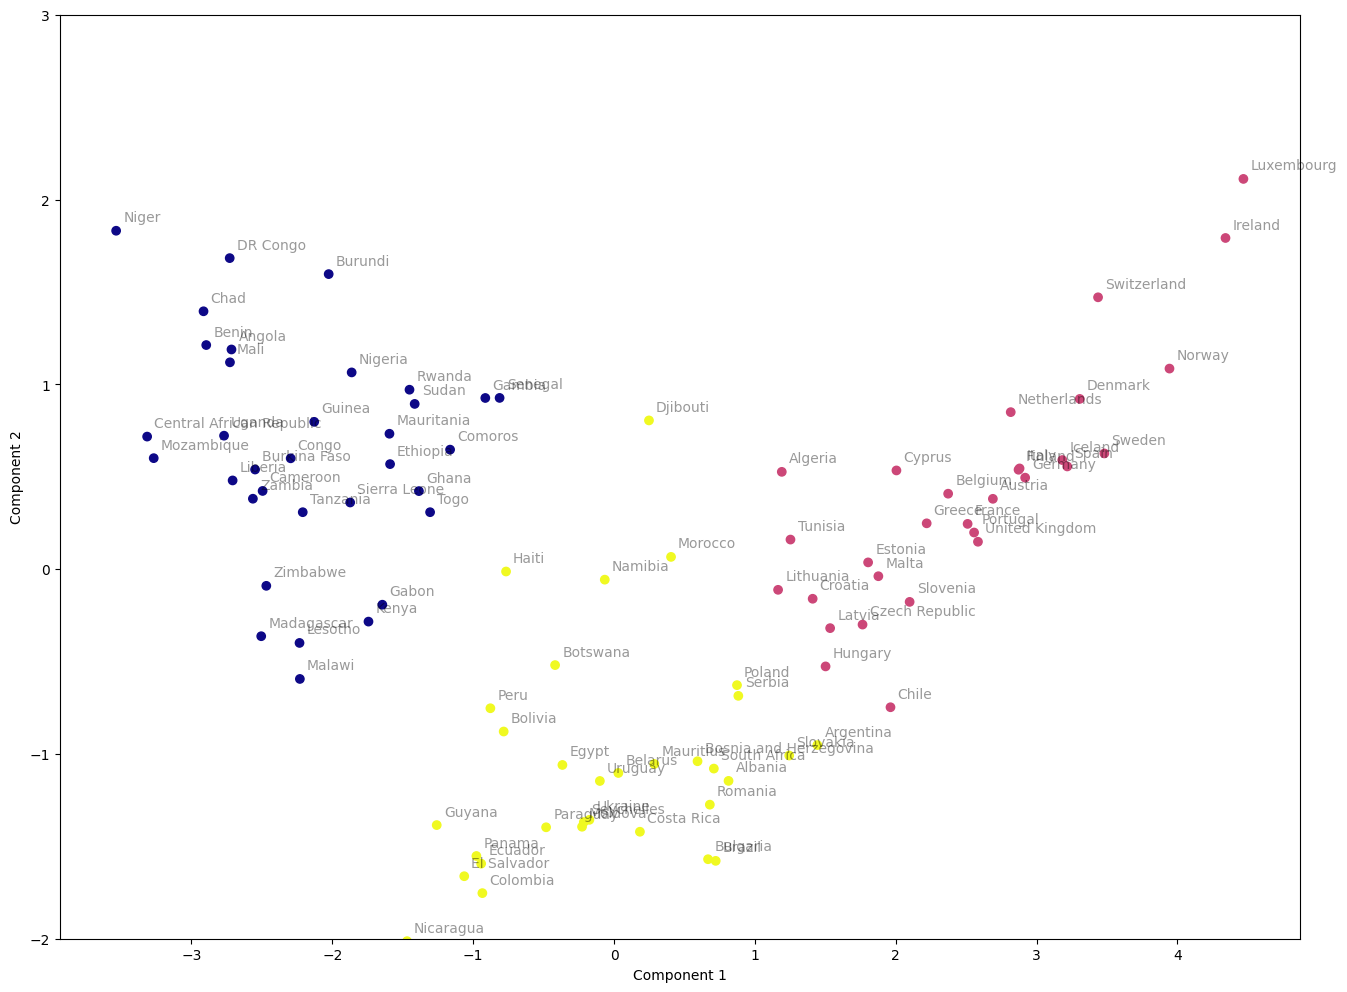

In [41]:
plt.figure(figsize=(16,12))
plt.scatter(results_pca[:,0], results_pca[:,1],
           c = kmeans.fit(df_regions_std).labels_, # kolor reprezentuje przynależność do skupienia
           cmap='plasma')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.ylim(-2,3.0)
for i in range(len(df_regions_std)):
    plt.annotate(df_regions_std.index[i],(results_pca[i,0]+0.05, results_pca[i,1]+0.05),alpha=0.4)
plt.show()